In [1]:
%matplotlib inline

In [2]:
# Load EDC example data
from arpes.io import load_data
f = load_data('EDC_AN_P2p5_25eV_CIRCP_LT_10eVpass_0001.h5', location="ULTRA")

C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs\unnamed_2022-09-15_12-24-20.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


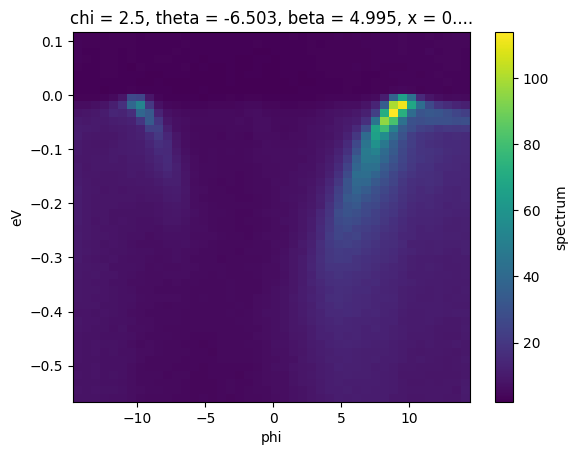

In [7]:
from arpes.analysis.general import rebin

rebin(f, phi=15, eV=2rebin?0).S.plot()

In [8]:
rebin?

Signature:
rebin(
    data: Union[xarray.core.dataarray.DataArray, xarray.core.dataset.Dataset],
    shape: dict = None,
    reduction: Union[int, dict] = None,
    interpolate=False,
    **kwargs,
)
Docstring:
Rebins the data onto a different (smaller) shape.

By default the behavior is to
split the data into chunks that are integrated over. An interpolation option is also
available.

Exactly one of ``shape`` and ``reduction`` should be supplied.

Dimensions corresponding to missing entries in ``shape`` or ``reduction`` will not
be changed.

Args:
    data
    interpolate: Use interpolation instead of integration
    shape: Target shape
    reduction: Factor to reduce each dimension by

Returns:
    The rebinned data.
File:      c:\users\hellbrue\documents\repositories\pyarpes\arpes\analysis\general.py
Type:      function


C:\Users\hellbrue\Documents\Repositories\pyarpes\arpes\provenance.py:220: UserWarning: Parent array has no ID.
  warnings.warn("Parent array has no ID.")


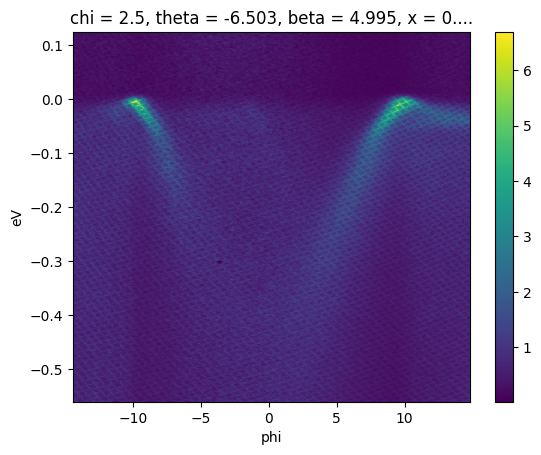

In [13]:
from arpes.preparation import normalize_dim

# make slices equal intensity at every energy
normalize_dim(f.spectrum, "phi").plot()

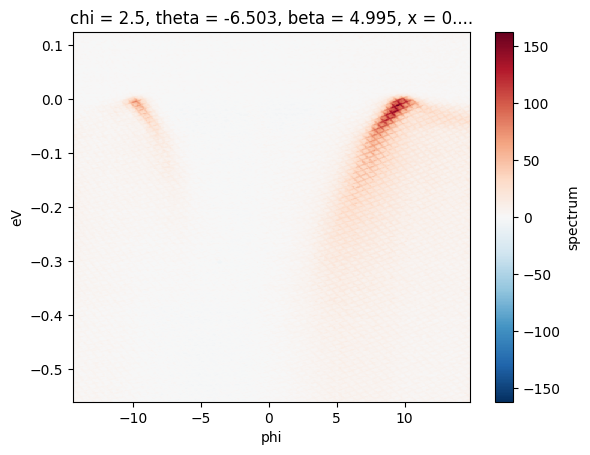

In [16]:
# Background subtraction
(f - f.sel(phi=slice(-1.4, -0.6)).mean("phi")).S.plot()

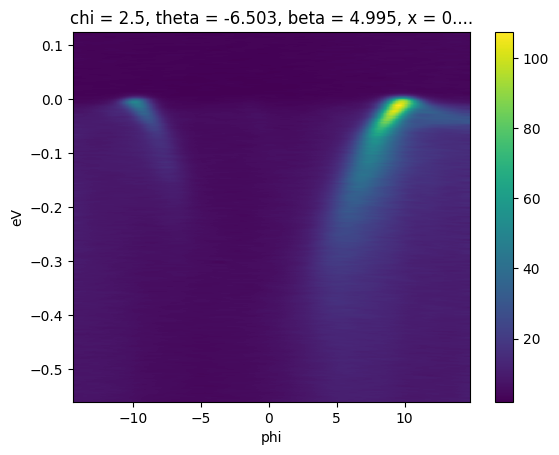

In [20]:
from arpes.analysis.filters import gaussian_filter_arr
# Smoothing
gaussian_filter_arr(f.spectrum, sigma={"phi": 0.5}).S.plot()

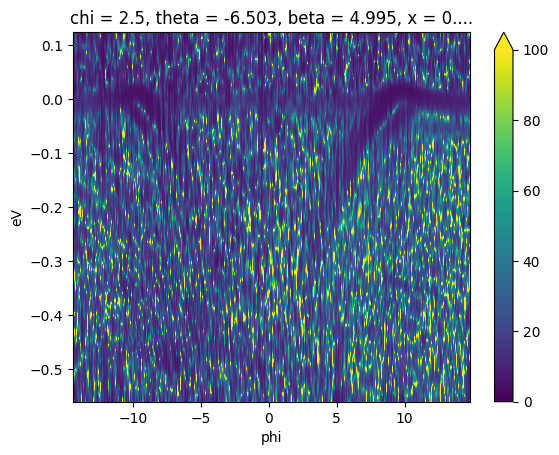

In [21]:
from arpes.analysis.derivative import minimum_gradient

minimum_gradient(gaussian_filter_arr(
    f.spectrum, sigma={"phi": 0.01, "eV": 0.01})).plot(vmin=0, vmax=100)